**expected behaviour:**
1. scan the terrain
2. locate panel
3. drive toward (close to the) panel

**algorithm:**
1. video acquisition
2. panel highlighting
    1. terrain remotion
    2. filtering
3. roi identification
    1. contours
    1. bounding box and center
4. motion
    1. motion direction
    2. motion performance
5. panel tracking
    1. roi features
    2. features matching
    3. moved roi estimation


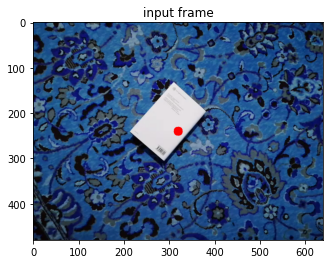

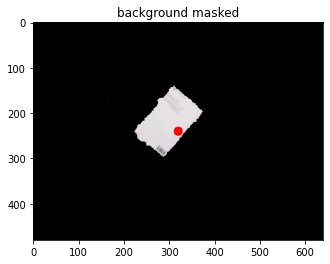

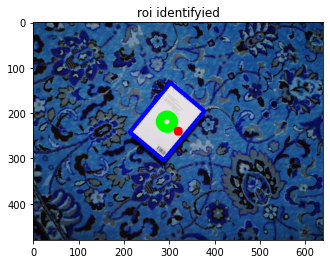

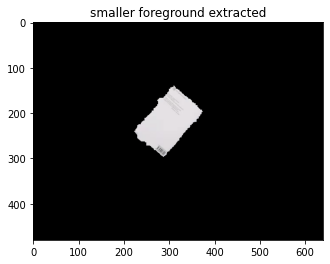

In [2]:
# import dependencies
%run foregroundFoo.ipynb

# from foregroundFoo import panelFy,panelTra,roiFy

# add POV center
centMark=1

# video source
videoSrc='../../images/video/test/carpet/vid2.mp4'
# videoSrc='http://192.168.1.83:8080/video?type=some.mjpeg'

# image source
# imageSrc='../../images/'

# sample source
samplesLib='../../images/test/carpet/samples/'
# samplesLib='../../images/test/box/samples/'


# VIDEO STRAM ACQUISITION ROUTINE ########

while(1):    
    objectVideo = cv.VideoCapture(videoSrc)
    if objectVideo.isOpened():break
    print('...waiting camera');time.sleep(3)

# ROI ####################

# fancy video acquisition
#frameVid,frameSiz=videoGe(videoSrc)
# draw pov marker
#if centMark: cv.circle(frameVid,(widthFrame//2,heightFrame//2),10,(255),-1)
#plt.title('input frame');plt.imshow(frameVid);plt.show()



# acquisition of first frame #########

returnCapture, frameVid =objectVideo.read()

# frame shape
heightFrame,widthFrame,_=frameVid.shape

# show result
frameDis=cv.circle(frameVid.copy(),(widthFrame//2,heightFrame//2),\
              10,(255),-1) if centMark else frameVid.copy()
plt.title('input frame');plt.imshow(frameDis);plt.show()



# remotion of background #########

# foreground (pass) mask
panelMask=panelFy(frameVid,samplePath=samplesLib,bypassComp=1)

# masked image
# maskedImg=cv.bitwise_and(frameVid,panelMask)##3channel mask
maskedImg=cv.bitwise_and(frameVid,frameVid,mask=panelMask)##mono channel mask

# show background remotion result
maskedDis=cv.circle(maskedImg.copy(),(widthFrame//2,heightFrame//2),\
                    10,(255),-1) if centMark else maskedImg.copy()
plt.title('background masked');plt.imshow(maskedDis);plt.show()




# identification of panel  #######

hudImg,(rco,(wr,hr),roiangle),roiMask=roiFy(frameVid,groundRef=panelMask,rotated=1)

# roi center and ul-most vertex
(rcox,rcoy)=rco
roix,roiy=rcox-wr//2,rcoy-hr//2
# show panel identification result
hudDis=cv.circle(hudImg.copy(),(widthFrame//2,heightFrame//2),\
                 10,(255),-1) if centMark else hudImg.copy()
plt.title('roi identifyied');plt.imshow(hudDis);plt.show()

# show hull mask result
plt.title('smaller foreground extracted');
plt.imshow(cv.bitwise_and(maskedImg,maskedImg,mask=roiMask));plt.show()




# TRACKING ###################################

methodTrkLib=('histogram','subtraction')#,'feature')
methodTrk=methodTrkLib[0]

if methodTrk=='histogram' or methodTrk=='feature':
# using histogram/feature tracking
    
    panelTra(frameVid,roix,roiy,wr,hr,videobject=objectVideo,nocentr=0,\
             trackmethod=methodTrk,distancearray=[],doMeanShift=0)
#     panelTra(frameVid,roix,roiy,wr,hr,videobject=objectVideo,nocentr=0,rotatedroi=(rco,(wr,hr),roiangle),\
#              trackmethod=methodTrk,distancearray=[],doMeanShift=0)
else:
# re-performing background remotion and panel identification
#_modify such that backprojection mask calculated only on roihistogram and not by summing masks of background hist

    while(1):
        # frame acquisition
        if objectVideo.isOpened():
            returnCaptureTrk, frameVidTrk =objectVideo.read()
        else:objectVideo.release()#; raise error
        if returnCaptureTrk:
            # remotion of background
            panelMaskTrk=panelFy(frameVidTrk,samplePath=samplesLib,bypassComp=1)
            # maskedImgTrk=cv.bitwise_and(frameVidTrk,panelMaskTrk)##3channel mask
            maskedImgTrk=cv.bitwise_and(frameVidTrk,frameVidTrk,mask=panelMaskTrk)##mono channel mask
            
#             maskedDisTrk=cv.circle(maskedImgTrk.copy(),(widthFrame//2,heightFrame//2),\
#                         50,(255),-1) if centMark else maskedImgTrk.copy()
#             plt.title('background masked');plt.imshow(maskedDisTrk[:,:widthFrame//2]);plt.show()

            # identification of panel  
            hudImgTrk,(rcoTrk,(wrTrk,hrTrk),roiangleTrk),roiMaskTrk=roiFy(\
                            frameVidTrk,groundRef=panelMaskTrk,nocount=0,rotated=1)
            # center and ul-most vertex
            (rcoxTrk,rcoyTrk)=rcoTrk
            roixTrk,roiyTrk=rcoxTrk-wrTrk//2,rcoyTrk-hrTrk//2
            # show tracking result
#             plt.title('smaller foreground extracted');
#             plt.imshow(cv.bitwise_and(maskedImgTrk,maskedImgTrk,mask=roiMaskTrk));plt.show()
            hudDisTrk=cv.circle(hudImgTrk.copy(),(widthFrame//2,heightFrame//2),10,\
                        (255),-1) if centMark else hudImgTrk.copy()
            cv.imshow('tracking result',hudDisTrk)
            k = cv.waitKey(30) & 0xff
            if k == 27:break
        else:break
objectVideo.release();cv.destroyAllWindows()

### continuos stream operation

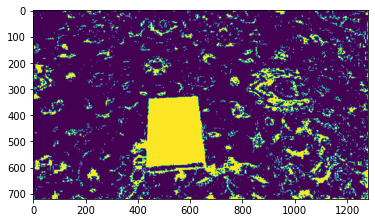

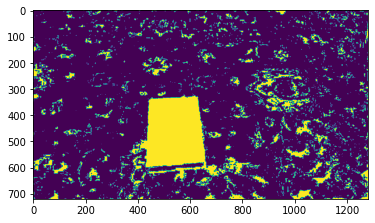

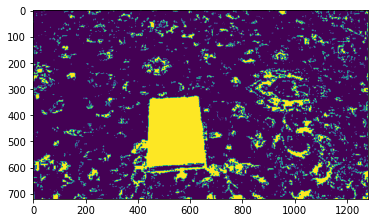

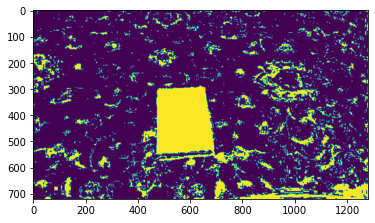

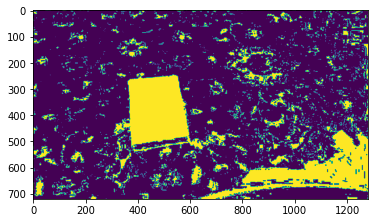

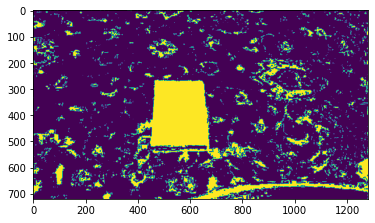

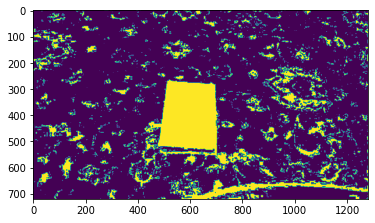

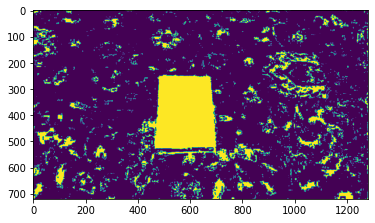

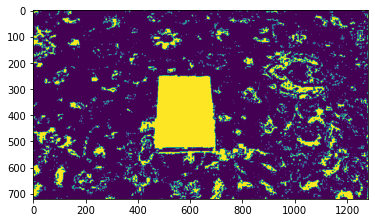

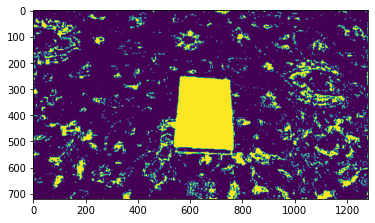

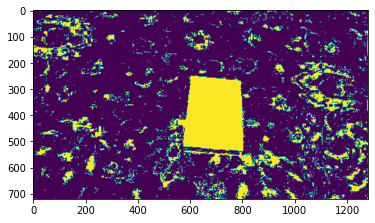

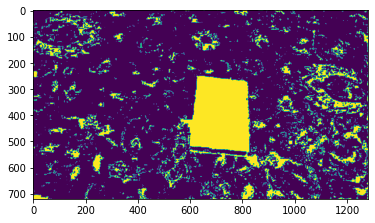

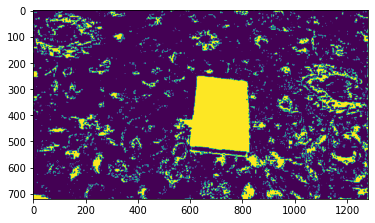

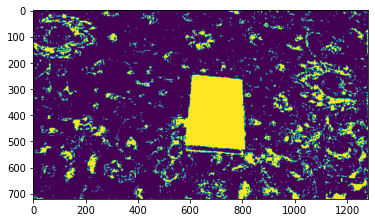

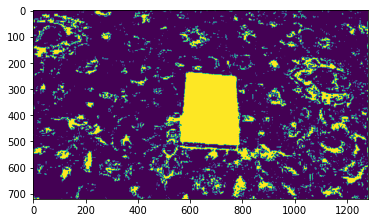

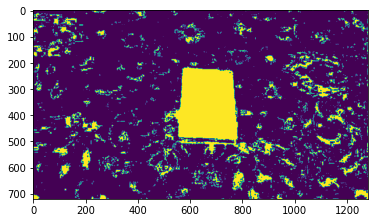

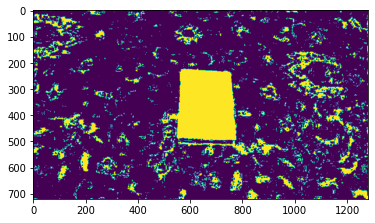

In [13]:
# imports dependencies
%run foregroundFoo.ipynb

# from foregroundFoo import panelFy,panelTra,roiFy

# add POV center
centMark=1

# video source
# videoSrc='../../images/video/carpet/vid1.mp4'
videoSrc='http://192.168.1.83:8080/video?type=some.mjpeg'

# image source
# imageSrc='../../images/'

# sample source
samplesLib='../../images/test/carpet/samples/'
# samplesLib='../../images/test/desk/samples/'
# samplesLib='../../images/test/box/samples/'

# # ROI ####################
# waiting until image sensor is streaming

while(1):    
    objectVideo = cv.VideoCapture(videoSrc)

    if objectVideo.isOpened():            
        # frame shape
        heightFrame=int(objectVideo.get(cv.CAP_PROP_FRAME_HEIGHT))
        widthFrame=int(objectVideo.get(cv.CAP_PROP_FRAME_WIDTH))
        fpsFrame=objectVideo.get(cv.CAP_PROP_FPS)
        returnCapture=True
        break
    print('...waiting camera');time.sleep(3)

# CYCLIC OPERATION ########

# tracking duration, in seconds
track_duration=3

# foreground(panel) mask initialization
panelMask=[]

while(returnCapture):
    
    # acquisition of first frame #########
    
    returnCapture, frameVid = objectVideo.read()
    # show result
    frameDis=cv.circle(frameVid.copy(),(widthFrame//2,heightFrame//2),\
                   10,(255),-1) if centMark else frameVid.copy()
    
    
    # remotion of background #########

    # foreground (pass) mask
    panelMask=panelFy(frameVid,samplePath=samplesLib)#,bypassComp=1)
    # masked image
    maskedImg=cv.bitwise_and(frameVid,frameVid,mask=panelMask)
    #     maskedImg=cv.bitwise_and(frameVid,panelMask)##     3channel mask

    # show background remotion result
#     maskedDis=cv.circle(maskedImg.copy(),(widthFrame//2,heightFrame//2),\
#                         10,(255),-1) if centMark else maskedImg.copy()
#     plt.title('background masked');plt.imshow(maskedDis);plt.show()
    plt.imshow(panelMask);plt.show()
    
    # identification of panel  #######

    hudImg,(rco,(wr,hr),roiangle),roiMask=roiFy(frameVid,groundRef=panelMask,rotated=1)
    # roi center and ul-most vertex
    (rcox,rcoy)=rco
    roix,roiy=rcox-wr//2,rcoy-hr//2

    # show panel identification result
#     hudDis=cv.circle(hudImg.copy(),(widthFrame//2,heightFrame//2),\
#                      10,(255),-1) if centMark else hudImg.copy()
#     plt.title('roi identifyied');plt.imshow(hudDis);plt.show()
    
    # show hull mask result
#     plt.title('smaller foreground extracted');
#     plt.imshow(cv.bitwise_and(maskedImg,maskedImg,mask=roiMask));plt.show()

    # TRACKING ###################################

    methodTrk='histogram'
    trackArray=[]
    returnCapture=panelTra(frameVid,roix,roiy,wr,hr,videobject=objectVideo,\
                           distancearray=trackArray,trackmethod=methodTrk,doMeanShift=1,\
                           trTimer=track_duration,nocentr=0,cyclicOp=1)
    
    # loop break bypass, USE STOP BUTTON
#     returnCapture=True

#     print('--------------------------')
#     print(trackArray)
    cyckey=cv.waitKey(30) & 0xff
    if cyckey == 27:break
objectVideo.release();
# print('########################################################################Ã ')
# print(trackArray)